In [7]:
from IPython.core.interactiveshell import InteractiveShell

In [3]:
import numpy as np
from matplotlib import pyplot as plt


In [11]:
# Data
x = np.array([
    [1,1,1],
    [1,2,1],
    [1,1,2],
    [1,2,4],
    [1,3,3],
    [1,4,2]
]);
y = np.array([
    [-1],
    [-1],
    [-1],
    [1],
    [1],
    [1]
])
w = np.array([
    [0.1,0.1, 0.1]
])
eta = 0.1

# Get the points for the two groups
# This will be used for the graph later
xlist = x.tolist()
ylist = y.tolist()
red = []
blue = []
for i in range(0, len(xlist)):
    if ylist[i][0] == 1:
        red.append(xlist[i])
    else:
        blue.append(xlist[i])

points_red = np.array([[item[1], item[2]] for item in red])
red_x , red_y = points_red.T

points_blue = np.array([[item[1], item[2]] for item in blue])
blue_x, blue_y = points_blue.T

# The first chunk will have the entire code in a loop
For the walkthrough jump down

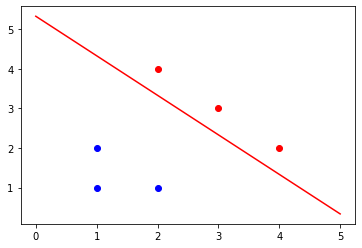

In [12]:
while(1):
    mask = (y*np.dot(x, w.T)<0).reshape(x.shape[0])
    if np.all(mask == 0):
        break
    x_error = x[mask, :]
    y_error = y[mask, :]
    z = np.sum(x_error*y_error, axis=0, keepdims=True)
    w = w + eta*z
# At this point we have the final w vector
# Let's seperate the points and plot everything on a graph now

# Get the formula of the line (we are using y=mx+b)
m = w[0][1]/w[0][2]
b = w[0][0]/w[0][2]
line_x = np.linspace(0,5,5)
line_y = -1*(m*line_x+b)

# Plot the graph
plt.plot(line_x, line_y, '-r', label='model')
plt.scatter(red_x, red_y, color='red')
plt.scatter(blue_x, blue_y, color='blue')
plt.show()

In [9]:
results

array([[1. ],
       [0.7],
       [0.7],
       [0.2],
       [0.2],
       [0.2]])

# Walkthrough

In [17]:
# to classify the training instances with W we do the w0x0 + w1x1 + w2x2 
# this is the same as np.dot(x, w.T);

print(np.dot(x, w.T));


[[0.3]
 [0.4]
 [0.4]
 [0.7]
 [0.7]
 [0.7]]


In [19]:
# To see what training instances are incorrect we can do
# ywx < 0 ? incorrect : correct
# To do this over an entire array we can just do
# y*x@w.T

results = y*np.dot(x, w.T)
print(results)

# As we can see from the results, the first three instances are incorrect

[[-0.3]
 [-0.4]
 [-0.4]
 [ 0.7]
 [ 0.7]
 [ 0.7]]


In [27]:
# Now we need to get the incorrect instances using a mask and
mask = (y*np.dot(x, w.T)<0).reshape(x.shape[0])
mask

array([ True,  True,  True, False, False, False])

In [32]:
#Using this new mask we can get only the rows of x,y, and w that were misclassified

x_error = x[mask, :]
y_error = y[mask, :]
x_error


array([[1, 1, 1],
       [1, 2, 1],
       [1, 1, 2]])

In [33]:
# Using x_error and y_error we can compute how much to change w by
z = np.sum(x_error*y_error, axis=0, keepdims=True)
z

array([[-3, -4, -4]])

In [34]:
# Now using the sum of the errors, calculate the new w
w = w + eta*z
w

array([[-0.2, -0.3, -0.3]])